In [1]:
import os
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', 100)

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
def LoadDataFrame(path):
    print('LoadDataFrame:', path)
    currentDir = os.curdir;
    os.chdir(path)
    temp_df = pd.DataFrame()
    for root, dirs, files in os.walk("."):
        if (root.endswith("Tribesmen")):
            for file in files:
                if (file.startswith("IndividualSucess.txt")):
                    temp_df = pd.read_csv(root + "/" + file)
    os.chdir(currentDir)
    return temp_df

In [3]:
experiments = [
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV He CUL none G 40 AR 003",
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV He CUL none G 40 AR 025",
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV TrE CUL none G40 AR 003",
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV TrE CUL none G40 AR 025",
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV TrE CUL none G4000 AR 003",
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV TrE CUL none G4000 AR 025",
    "d:\\Projects\\Tribes\\Logs\\Age\\NoGompez\\Gini\\EV TrE CUL none G100 AR 003"
]
labels = [
    'G40AR003HE',
    'G40AR025HE',
    'G40AR003TrE',
    'G40AR025TrE',
    'G4000AR003TrE',
    'G4000AR025TrE',
    'G100AR003TrE'
]
affectedGene = [
    'gen.HE',
    'gen.HE',
    'gen.TrE',
    'gen.TrE',
    'gen.TrE',
    'gen.TrE',
    'gen.TrE'
]
data = [LoadDataFrame(file) for file in experiments]

LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV He CUL none G 40 AR 003
LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV He CUL none G 40 AR 025
LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV TrE CUL none G40 AR 003
LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV TrE CUL none G40 AR 025
LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV TrE CUL none G4000 AR 003
LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV TrE CUL none G4000 AR 025
LoadDataFrame: d:\Projects\Tribes\Logs\Age\NoGompez\Gini\EV TrE CUL none G100 AR 003


In [4]:
data[0].describe()

,birthYear,age,children,totalResourcesCollected,gen.TrL,gen.TrE,gen.TeL,gen.TeE,gen.SL,gen.SE,gen.FRPL,gen.FRDE,gen.HL,gen.HE,gen.HBE,gen.CE,gen.ML,gen.Cre,gen.Usl,gen.AR,phen.TrL,phen.TrE,phen.TeL,phen.TeE,phen.SL,phen.SE,phen.FRPL,phen.FRDE,phen.HL,phen.HE,phen.HBE,phen.CE,phen.ML,phen.Cre,phen.Usl,phen.AR
count,784876.000000,784876.000000,784876.000000,784876.000000,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.000000,784876.0,784876.0,784876.0,784876.0,784876.0,7.848760e+05,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.0,784876.000000,784876.0,784876.0,784876.0,784876.0,784876.0,7.848760e+05
mean,30539.510189,38.394007,2.000427,289.445525,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,18.252206,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,18.252206,0.0,1.0,0.0,0.0,0.0,3.000000e-02
std,19374.302458,22.821484,1.299573,179.470894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.651847,0.0,0.0,0.0,0.0,0.0,1.552440e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.651847,0.0,0.0,0.0,0.0,0.0,1.552440e-13
min,0.000000,1.000000,0.000000,2.377000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9.101000,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9.101000,0.0,1.0,0.0,0.0,0.0,3.000000e-02
25%,12578.000000,19.000000,1.000000,139.335750,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,14.490000,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,14.490000,0.0,1.0,0.0,0.0,0.0,3.000000e-02
50%,30034.000000,36.000000,2.000000,272.540000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,18.721000,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,18.721000,0.0,1.0,0.0,0.0,0.0,3.000000e-02
75%,47521.000000,55.000000,3.000000,419.127500,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,22.634000,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,22.634000,0.0,1.0,0.0,0.0,0.0,3.000000e-02
max,68997.000000,124.000000,9.000000,962.738000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,26.989000,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,26.989000,0.0,1.0,0.0,0.0,0.0,3.000000e-02


In [5]:
data[len(data)-1].describe()

,birthYear,age,children,totalResourcesCollected,gen.TrL,gen.TrE,gen.TeL,gen.TeE,gen.SL,gen.SE,gen.FRPL,gen.FRDE,gen.HL,gen.HE,gen.HBE,gen.CE,gen.ML,gen.Cre,gen.Usl,gen.AR,phen.TrL,phen.TrE,phen.TeL,phen.TeE,phen.SL,phen.SE,phen.FRPL,phen.FRDE,phen.HL,phen.HE,phen.HBE,phen.CE,phen.ML,phen.Cre,phen.Usl,phen.AR
count,727120.000000,727120.000000,727120.000000,727120.000000,727120.0,727120.000000,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,7.271200e+05,727120.0,727120.000000,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,727120.0,7.271200e+05
mean,34127.163857,43.319546,2.000864,328.810711,1.0,3.968482,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,3.968482,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02
std,21893.838260,23.674035,1.122879,180.548053,0.0,2.044679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.510664e-14,0.0,2.044679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.510664e-14
min,0.000000,1.000000,0.000000,2.845000,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02
25%,13058.000000,24.000000,1.000000,184.647000,1.0,2.366000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,2.366000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02
50%,33032.000000,43.000000,2.000000,324.184000,1.0,4.112000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,4.112000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02
75%,54005.000000,61.000000,3.000000,462.360000,1.0,5.893000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,5.893000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02
max,69993.000000,134.000000,10.000000,996.709000,1.0,7.076000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02,1.0,7.076000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,3.000000e-02


[0.19335338262498225,
 0.11934913600089836,
 0.19279942104424586,
 0.11949470359056646,
 0.1974771878659476,
 0.11559673571548412,
 0.19665442448482673]

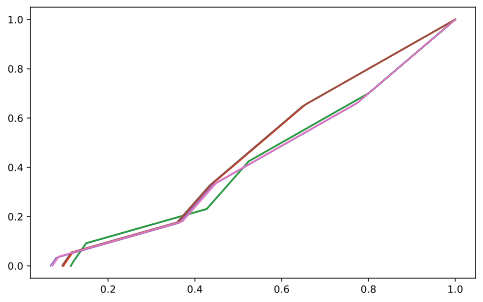

In [6]:
ReproductiveSuccess = [df['children'].value_counts(normalize=True) for df in data]
def GiniCoefficient(series):
    composed = pd.DataFrame({
        'children':series.index,
        'tribesman':series,
        'resources':[series[i]*i for i in series.index]
    }).sort_values(by=['resources'])
    composed.index = range(len(composed))
    total_resources = composed['resources'].sum()
    composed['resources'] = composed['resources']/total_resources
    composed['lorenc-1'] = [sum(composed['resources'][0:i]) for i in composed.index]
    composed['lorenc'] = [sum(composed['resources'][0:i+1]) for i in composed.index]
    composed['tribesman_accumulated'] = [sum(composed['tribesman'][0:i+1]) for i in composed.index]
    plt.plot(composed['tribesman_accumulated'], composed['lorenc'])
    #print(composed)
    return 1 - sum(composed['tribesman']*(composed['lorenc']+composed['lorenc-1']))
gini = [GiniCoefficient(values) for values in ReproductiveSuccess]
gini # Коэфициент Джини по количеству детей. Мы видим, что уровень неравенства заметно ниже при короткой жизни.
# Среда давит, некогда на конкуренцию отвлекаться.

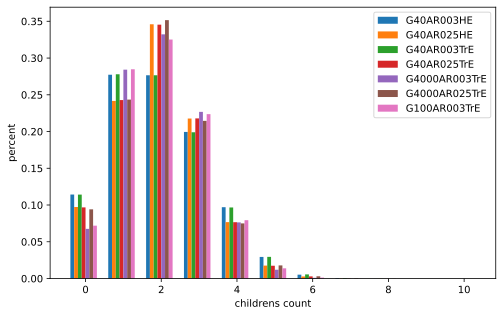

In [7]:
for col in range(len(ReproductiveSuccess)):
    col_index = ReproductiveSuccess[col].index.sort_values()
    col_values = ReproductiveSuccess[col][col_index]
    plt.bar(col_index - (len(ReproductiveSuccess)/2 - col)*0.1, col_values, width = 0.1, label = labels[col])
plt.legend()
plt.xlabel('childrens count')
plt.ylabel('percent')
plt.show()


In [8]:
deathCauses = [df['deathCause'].value_counts(normalize=True) for df in data]
df = pd.DataFrame(deathCauses)
df.index = labels
df

,age,hunger,lonliness
G40AR003HE,0.803997,0.191583,0.004420
G40AR025HE,0.999077,0.000006,0.000917
G40AR003TrE,0.806600,0.189108,0.004291
G40AR025TrE,0.999342,NaN,0.000658
G4000AR003TrE,1.000000,NaN,NaN
G4000AR025TrE,1.000000,NaN,NaN
G100AR003TrE,0.981630,0.018118,0.000252


In [9]:
period = 100
# для начала надо всех рассортировать по веку рождения, чтобы посмотреть средние за век значения признаков.
for e in range(len(data)):
    df = data[e];
    df['century'] = df['birthYear']//period
    sub_df = pd.DataFrame(df[['century', affectedGene[e]]])
    century_mean = sub_df.groupby('century').mean()
    #Делаем медленно и влоб, потому что по умному что-то не придумывается
    df['relativeProperty'] = [df[affectedGene[e]][i]/century_mean[affectedGene[e]][df['century'][i]] - 1 for i in range(len(df))]
    print(df['relativeProperty'].describe())


count    7.848760e+05
mean     9.058117e-16
std      1.237499e-02
min     -1.727462e-01
25%     -2.584326e-03
50%      6.056770e-06
75%      2.173098e-03
max      1.654428e-01
Name: relativeProperty, dtype: float64
count    1.566238e+06
mean    -1.250910e-14
std      1.344380e-02
min     -1.137419e-01
25%     -6.694716e-03
50%      4.379097e-04
75%      6.576761e-03
max      1.171295e-01
Name: relativeProperty, dtype: float64
count    7.032530e+05
mean    -2.309548e-15
std      8.135440e-02
min     -1.000000e+00
25%     -1.444577e-02
50%     -1.596050e-03
75%      1.374241e-02
max      1.875771e+00
Name: relativeProperty, dtype: float64
count    8.795510e+05
mean    -4.469788e-15
std      1.533197e-01
min     -1.000000e+00
25%     -3.518843e-02
50%      1.215457e-03
75%      3.053111e-02
max      1.655185e+00
Name: relativeProperty, dtype: float64
count    1.258451e+06
mean     2.743106e-16
std      3.596700e-01
min     -1.000000e+00
25%     -6.003684e-03
50%      5.149398e-05
75%     

In [43]:
[data[i]['age'] >= 6][data[i]['birthYear'] >= 10000]


<ipython-input-43-56eaf6e9504b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[data[i]['birthYear'] >= 10000].min()


birthYear                        10908
age                                  6
children                             0
totalResourcesCollected         13.185
deathCause                         age
tribeName                  Aabar-73741
gen.TrL                              1
gen.TrE                              0
gen.TeL                              1
gen.TeE                              0
gen.SL                               1
gen.SE                               1
gen.FRPL                             0
gen.FRDE                             0
gen.HL                               1
gen.HE                          13.048
gen.HBE                              0
gen.CE                               1
gen.ML                               0
gen.Cre                              0
gen.Usl                              0
gen.AR                            0.03
phen.TrL                             1
phen.TrE                             0
phen.TeL                             1
phen.TeE                 

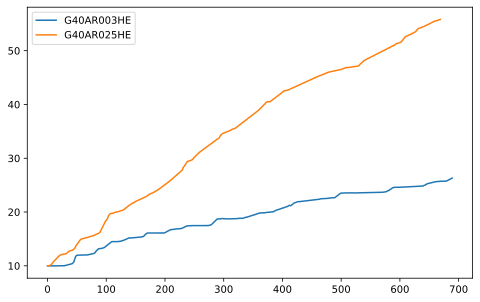

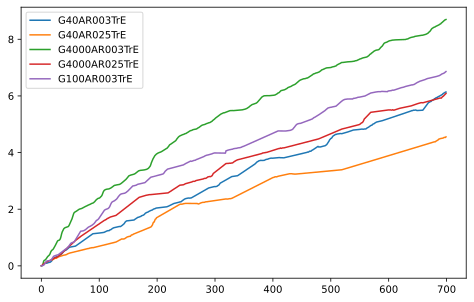

In [19]:
for e in range(2):
    df = data[e];
    df['century'] = df['birthYear']//period
    sub_df = pd.DataFrame(df[['century', affectedGene[e]]])
    century_mean = sub_df.groupby('century').mean()
    plt.plot(century_mean.index, century_mean, label=labels[e])
plt.legend()
plt.show()
for e in range(2,len(data)):
    df = data[e];
    df['century'] = df['birthYear']//period
    sub_df = pd.DataFrame(df[['century', affectedGene[e]]])
    century_mean = sub_df.groupby('century').mean()
    plt.plot(century_mean.index, century_mean, label=labels[e])
plt.legend()
plt.show()

In [90]:
#А теперь надо сравнить зависимость ресурсного успеха и репродуктивного успеха от значения He и TrE
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression

for i in range(len(data)):
    skm = LinearRegression()
    skm_data = pd.DataFrame({
        'relativeProperty':data[i]['relativeProperty'][data[i]['age'] >= 6],
        'resources':(data[i]['totalResourcesCollected']/data[i]['age'])[data[i]['age'] >= 6]
    })
    # Количество детей драматически отличается от среднего для тех, кто не пережил юности
    skm_data.dropna()
    skm_data = skm_data.iloc[len(skm_data)//10:];
    #print(skm_data.describe())
    
    x = skm_data.iloc[:,:-1] - skm_data.iloc[:,:-1].mean()
    y = skm_data.iloc[:,-1] - skm_data.iloc[:,-1].mean()
    skm.fit(x, y)
    # и выведем параметры рассчитанной модели
    print ('label:', labels[i], 'Коэффициент', skm.coef_)


label: G40AR003HE Коэффициент [2.63122638]
label: G40AR025HE Коэффициент [7.94594544]
label: G40AR003TrE Коэффициент [1.75030341]
label: G40AR025TrE Коэффициент [0.67711267]
label: G4000AR003TrE Коэффициент [5.8417278]
label: G4000AR025TrE Коэффициент [1.17902211]
label: G100AR003TrE Коэффициент [3.00182779]
